# BT4222 Programming Test: Yelp Reviews Data

### Submit this .ipynb file to:  *LumiNUS > Files > Student Submissions > Programming Test*

### In addition, please use your NUS userID as the filename, i.e., "`a0123456.ipynb`"

## Introduction

This test uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- **`yelp.csv`** contains the dataset. 
- Each observation (row) in this dataset is a review of a particular business by a particular user.
- The **stars** column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The **text** column is the text of the review.
- The **useful** column is the number of people who think that the review is useful.
- The **funny** column is the number of people who think that the review is funny.
- The **cool** column is the number of people who think that the review is cool.

**Goal**:
 - Perform some kinds of **feature engineering**.
 - Predict the star rating of a review using the review text and other generated features.

**Tip:** After each task, I recommend that you check the shape and the contents of your objects, to confirm that they match your expectations.

## Import libraries

In [28]:
import pandas as pd
from scipy.sparse import vstack, hstack
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder

## Task 1 (2 marks) Received: 1m (Wrong answer)

Read **`yelp.csv`** into a Pandas DataFrame and find the **user_id** who have written the most number of reviews. 

In [29]:
## always try to read in data this way
import pandas as pd # read in dataframe(csv files) and do manipulation

path = './yelp.csv'
yelp = pd.read_csv(path)

In [30]:
yelp.shape

(10000, 10)

In [31]:
yelp.user_id.value_counts().sort_index().head

<bound method NDFrame.head of --65q1FpAL_UQtVZ2PTGew    5
--VxRvXk3b8FwsSbC2Zpxw    1
--rlgfAvvi0BtfRDA1p-VQ    1
-2S6keboidRPly-h5lBfkA    1
-2XA34d6OGYEUuzqC7yhBg    1
                         ..
zwjIdDClpnTqsly-O1Pe7g    1
zxcrlC3cmH5S2TGIxuLwBw    1
zxnoE5IjuWoI9mF1gwyg5w    1
zzhdnNeg65wupOXqYtGyJw    1
zzmRKNph-pBHDL2qwGv9Fw    1
Name: user_id, Length: 6403, dtype: int64>

In [106]:
yelp.groupby('user_id').count().sort_values(by="cool").tail(1)#.index


,business_id,date,review_id,stars,text,type,cool,useful,funny,bucket_useful,bucket_funny,bucket_cool,useful_funny_cool
user_id,,,,,,,,,,,,,
fczQCSmaWF78toLEmb0Zsw,38,38,38,38,38,38,38,38,38,38,38,38,38





## Task 2 (4 marks) Received: 1m (need draw 4 histograms in 1 figure)

Plot the histogram of cool, useful, funny and stars in one figure. 

**Hint:**
- A plot has been provided to you for references. 
- Refer to this [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html). 

<center>Expected result</center>

![Expected Result](http://gdurl.com/QZ0G)

In [33]:
import numpy as np

In [34]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histogram of Cool Scores')

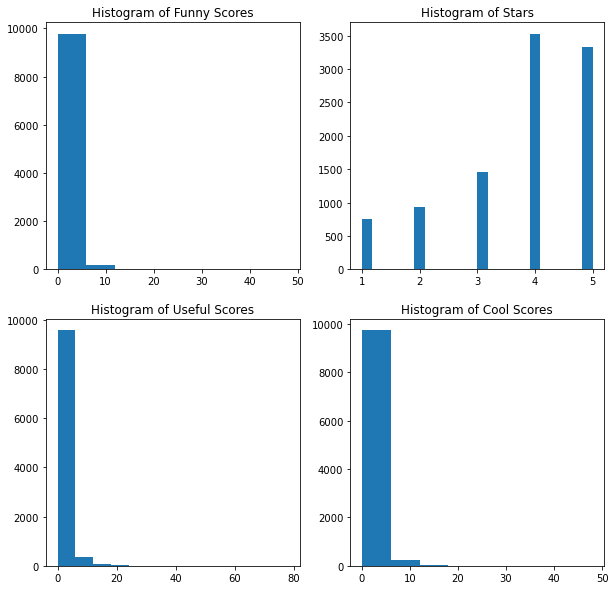

In [35]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))

axs[0, 0].hist(yelp['funny'], bins=range(0,51,6))
axs[0, 0].set_title('Histogram of Funny Scores')

axs[0, 1].hist(yelp['stars'], bins="auto")
axs[0, 1].set_title('Histogram of Stars')

axs[1, 0].hist(yelp['useful'], bins=range(0,80,6))
axs[1, 0].set_title('Histogram of Useful Scores')

axs[1, 1].hist(yelp['cool'], bins=range(0,51,6))
axs[1, 1].set_title('Histogram of Cool Scores')


#for ax in axs.flat:
 #   ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
 #   ax.label_outer()

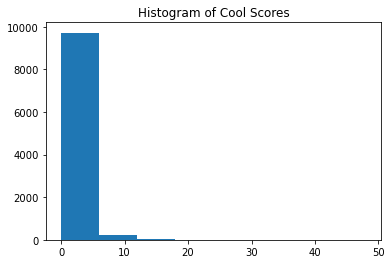

In [36]:

plt.hist(yelp['cool'], bins=range(0,51,6))
plt.title('Histogram of Cool Scores')
#plt.ylim(limit_range)
plt.show()

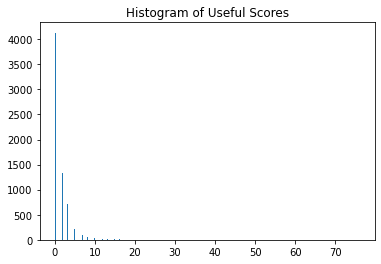

In [37]:
# np.histogram(yelp['useful'], bins=10)

plt.hist(yelp['useful'], bins="auto")
plt.title('Histogram of Useful Scores')
#plt.ylim(limit_range)
plt.show()

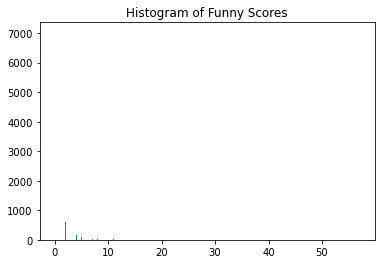

In [38]:
np.histogram(yelp['funny'], bins=10)

plt.hist(yelp['funny'], bins="auto")
plt.title('Histogram of Funny Scores')
#plt.ylim(limit_range)
plt.show()

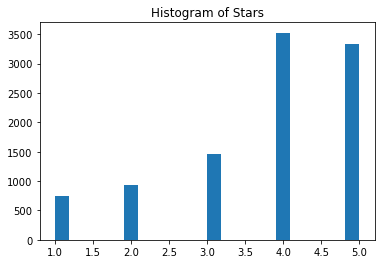

In [39]:
np.histogram(yelp['stars'], bins=10)

plt.hist(yelp['stars'], bins="auto")
plt.title('Histogram of Stars')
#plt.ylim(limit_range)
plt.show()

## Task 3 (4 marks) Received: 4m

Create the following features with the mapping rules provided. (**Note the open and close brackets**)

- **bucket_useful**: 
  - useful: [0, 50 Percentile) -> 0
  - useful: [50 Percentile, 75 Percentile) -> 1
  - useful: [75 Percentile, inf) -> 2
- **bucket_funny**: 
  - useful: [0, 75 Percentile) -> 0
  - useful: [75 Percentile, inf) -> 1
- **bucket_cool**: 
  - useful: [0, 75 Percentile) -> 0
  - useful: [75 Percentile, inf) -> 1

**hint:** First find the 50 and 75 Percentile for the necessary columns.


In [40]:
#find the 50 percentile for useful 
np.percentile(yelp['useful'], 50)

1.0

In [41]:
#find the 75 percentile for useful 
np.percentile(yelp['useful'], 75)

2.0

In [42]:
yelp['bucket_useful'] = yelp['useful'].apply(lambda x: 0 if x <1.0 else (1 if x < 2.0 else 2))

#converter = lambda x : x*2 if x < 10 else (x*3 if x < 20 else x)

In [43]:
yelp['bucket_useful'].head()

0    2
1    0
2    1
3    2
4    0
Name: bucket_useful, dtype: int64

In [44]:
#find the 75 percentile for funny 
np.percentile(yelp['funny'], 75)

1.0

In [45]:
yelp['bucket_funny'] = yelp['funny'].apply(lambda x: 0 if x <1.0 else 1)

In [46]:
yelp['bucket_funny'].head()

0    0
1    0
2    0
3    0
4    0
Name: bucket_funny, dtype: int64

In [47]:
#find the 75 percentile for cool 
np.percentile(yelp['cool'], 75)

1.0

In [48]:
yelp['bucket_cool'] = yelp['cool'].apply(lambda x: 0 if x <1.0 else 1)

In [49]:
yelp['bucket_cool'].head()

0    1
1    0
2    0
3    1
4    0
Name: bucket_cool, dtype: int64

## Task 4 (4 marks) Received: 3 (Multiplication is not an one to one map. Different combinations can get the same value for the new feature)

Create a feature cross: **useful_funny_cool** from **bucket_useful**, **bucket_funny** and **bucket_cool**. 

In [50]:
# add 1 to bucket_useful, bucket_funny and bucket_cool to avoid multiplying by 0 error
yelp['useful_funny_cool'] = (yelp['bucket_useful'] +1) * (yelp['bucket_funny'] +1) * (yelp['bucket_cool']+1)

In [51]:
yelp['useful_funny_cool'] 

0       6
1       1
2       2
3       6
4       1
       ..
9995    6
9996    1
9997    1
9998    1
9999    1
Name: useful_funny_cool, Length: 10000, dtype: int64

In [52]:
# correct ans: 
yelp['useful_funny_cool'] = (yelp['bucket_useful'] *4) + (yelp['bucket_funny'] *2) + (yelp['bucket_cool'])


## Task 5 (1 mark) Received: 1m

Create a new DataFrame that only contains the **5-star** and **1-star** reviews.

In [53]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [54]:
# examine the shape
yelp_best_worst.shape

(4086, 14)

## Task 6 (2 marks) Received: 2m

Define X and y from the new DataFrame, and then split X and y into training and testing sets, using the **text** and **useful_funny_cool** as the only features and the **stars** as the target variable.

In [55]:
# define X and y
X = pd.concat([yelp_best_worst.text, yelp['useful_funny_cool']], axis=1, join="inner")
#X = yelp_best_worst.text
y = yelp_best_worst.stars #stars as target variable
# X

In [56]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [57]:
# examine the object shapes
print(X_train.shape)
print(X_test.shape)

(3064, 2)
(1022, 2)


## Task 7 (2 marks) Received: 2m

Use CountVectorizer to create **document-term matrices** from X_train and X_test.

In [58]:
# use CountVectorizer to create document-term matrices from X_train and X_test
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer() #we use the default parameters
#vect.get_params()

In [59]:
# fit and transform X_train
X_train_dtm = vect.fit_transform(X_train)

In [60]:
# only transform X_test
X_test_dtm = vect.transform(X_test)

In [61]:
# examine the shapes: rows are documents, columns are terms (aka "tokens" or "features")
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(2, 2)
(2, 2)


In [62]:
# show default parameters for CountVectorizer
#vect
vect.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

## Task 8 (2 marks) Received: 2m

Calculate the **null accuracy**, which is the classification accuracy that could be achieved by always predicting the most frequent class.

Please use **print** function to indicate the result. For example: print(null_accuracy)

- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains null accuracy and demonstrates two ways to calculate it, though only one of those ways will work in this case. Alternatively, you can come up with your own method to calculate null accuracy!

In [63]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

5    838
1    184
Name: stars, dtype: int64

In [64]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

5    0.819961
Name: stars, dtype: float64

## Task 9 (4 marks) Received: 4m

Based on the text feature, use Multinomial Naive Bayes to **predict the star rating** for the reviews in the testing set, and then **calculate the accuracy, precision, recall, ROC_AUC** and print the **confusion matrix** for both train and test.

Please use **print** function to indicate the results. For example: print(accuracy, precision, recall, ROC_AUC, confusion_matrix) You can also print them separately.  
- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains how to interpret both classification accuracy and the confusion matrix.

In [65]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [66]:
X = yelp_best_worst.text #since based on the text feature only
y = yelp_best_worst.stars

In [67]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [68]:
# examine the object shapes
print(X_train.shape)
print(X_test.shape)

(3064,)
(1022,)


In [69]:
# use CountVectorizer to create document-term matrices from X_train and X_test
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer() #we use the default parameters
#vect.get_params()

In [70]:
# fit and transform X_train
X_train_dtm = vect.fit_transform(X_train)

In [71]:
# only transform X_test
X_test_dtm = vect.transform(X_test)

In [72]:
# examine the shapes: rows are documents, columns are terms (aka "tokens" or "features")
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(3064, 16825)
(1022, 16825)


In [73]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 7.33 ms, sys: 2.91 ms, total: 10.2 ms
Wall time: 8.32 ms


MultinomialNB()

In [74]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [75]:
# calculate accuracy of class predictions
from sklearn import metrics
accuracy_test = metrics.accuracy_score(y_test, y_pred_class) #accuracy on test
print(accuracy_test)

0.9187866927592955


In [76]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class) #for test

array([[126,  58],
       [ 25, 813]])

In [90]:
#Corrections
metrics.precision_score(y_test, y_pred_class)

0.8344370860927153

In [91]:
precision_test = 126/(126+25)
print(precision_test) 

0.8344370860927153


In [92]:
recall_test = 126/(126+58)
print(recall_test)

0.6847826086956522


In [93]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1] #givces you probabilities of the messages 

In [94]:
# calculate AUC
ROC_AUC_test = metrics.roc_auc_score(y_test, y_pred_prob)
print(ROC_AUC_test)

0.9391635104285566


In [95]:
accuracy_train = metrics.accuracy_score(y_train, nb.predict(X_train_dtm)) #accuracy on train
print(accuracy_train)

0.972911227154047


In [96]:
# make class predictions for X_test_dtm
y_pred_class_train = nb.predict(X_train_dtm)

In [97]:
# print the confusion matrix
metrics.confusion_matrix(y_train, y_pred_class_train) #for train

array([[ 509,   56],
       [  27, 2472]])

In [98]:
metrics.precision_score(y_train, y_pred_class_train) #for train

0.9496268656716418

In [99]:
precision_train = 509/(509+27)
print(precision_train) 

0.9496268656716418


In [100]:
recall_test = 509/(509+56)
print(recall_test)

0.9008849557522124


In [101]:
y_pred_prob_train = nb.predict_proba(X_train_dtm)[:, 1] #givces you probabilities of the messages 

In [102]:
# calculate AUC
ROC_AUC_train = metrics.roc_auc_score(y_train, y_pred_prob_train)
print(ROC_AUC_test)

0.9391635104285566


## Task 10 (4 marks) Received: 4m

Calculate which 10 tokens are the most predictive of **5-star reviews**, and which 10 tokens are the most predictive of **1-star reviews**.

Please use the **print** function to indicate the results. For example: print(top10_5stars, top10_1stars)
- **Hint:** Naive Bayes automatically counts the number of times each token appears in each class, as well as the number of observations in each class. You can access these counts via the `feature_count_` and `class_count_` attributes of the Naive Bayes model object.

In [223]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names() #get feature names
len(X_train_tokens)

16825

In [224]:
# examine the first 50 tokens
print(X_train_tokens[0:50])

['00', '000', '00a', '00am', '00pm', '01', '02', '03', '03342', '04', '05', '06', '07', '09', '0buxoc0crqjpvkezo3bqog', '0l', '10', '100', '1000', '1000x', '1001', '100th', '101', '102', '105', '1070', '108', '10am', '10ish', '10min', '10mins', '10minutes', '10pm', '10th', '10x', '11', '110', '1100', '111', '111th', '112', '115th', '118', '11a', '11am', '11p', '11pm', '12', '120', '128i']


In [225]:
# examine the last 50 tokens
print(X_train_tokens[-50:])

['yyyyy', 'z11', 'za', 'zabba', 'zach', 'zam', 'zanella', 'zankou', 'zappos', 'zatsiki', 'zen', 'zero', 'zest', 'zexperience', 'zha', 'zhou', 'zia', 'zihuatenejo', 'zilch', 'zin', 'zinburger', 'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zipcar', 'zipper', 'zippers', 'zipps', 'ziti', 'zoe', 'zombi', 'zombies', 'zone', 'zones', 'zoning', 'zoo', 'zoyo', 'zucca', 'zucchini', 'zuchinni', 'zumba', 'zupa', 'zuzu', 'zwiebel', 'zzed', 'éclairs', 'école', 'ém']


In [226]:
# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

array([[26.,  4.,  1., ...,  0.,  0.,  0.],
       [39.,  5.,  0., ...,  1.,  1.,  1.]])

In [227]:
# rows represent classes, columns represent tokens
nb.feature_count_.shape

(2, 16825)

In [228]:
# number of times each token appears across all one-star messages
one_star_token_count = nb.feature_count_[0, :]
one_star_token_count

array([26.,  4.,  1., ...,  0.,  0.,  0.])

In [229]:
# number of times each token appears across all five-star messages
five_star_token_count = nb.feature_count_[1, :]
five_star_token_count

array([39.,  5.,  0., ...,  1.,  1.,  1.])

In [230]:
# create a DataFrame of tokens with their separate one-star and five-star counts
tokens = pd.DataFrame({'token':X_train_tokens, 'one_star':one_star_token_count, 'five_star':five_star_token_count}).set_index('token')

In [231]:
tokens.head()

,one_star,five_star
token,,
00,26.0,39.0
000,4.0,5.0
00a,1.0,0.0
00am,3.0,2.0
00pm,1.0,4.0


In [232]:
# examine 5 random DataFrame rows
tokens.sample(5, random_state=6)

,one_star,five_star
token,,
fourteen,1.0,0.0
bean,7.0,38.0
student,0.0,6.0
cerignola,0.0,1.0
bethany,0.0,2.0


In [233]:
# add 1 to one-star and five-star counts to avoid dividing by 0 error
tokens['one_star'] = tokens.one_star + 1
tokens['five_star'] = tokens.five_star + 1
tokens.sample(5, random_state=6) # we use the same random_state as above so the words are the 
# same as the above

,one_star,five_star
token,,
fourteen,2.0,1.0
bean,8.0,39.0
student,1.0,7.0
cerignola,1.0,2.0
bethany,1.0,3.0


In [234]:
# Naive Bayes counts the number of observations in each class
nb.class_count_
# one-star messages: 3617
# five-star messages: 562

array([ 565., 2499.])

In [235]:
# convert the one-star and five-star counts into frequencies
tokens['one_star'] = tokens.one_star / nb.class_count_[0]
tokens['five_star'] = tokens.five_star / nb.class_count_[1]
tokens.sample(5, random_state=6)
# we divide by class_count here to do normalisation so as to reduce the imbalance 
# caused by number of counts 

,one_star,five_star
token,,
fourteen,0.003540,0.000400
bean,0.014159,0.015606
student,0.001770,0.002801
cerignola,0.001770,0.000800
bethany,0.001770,0.001200


In [236]:
# calculate the ratio of spam-to-ham for each token
tokens['five_star_ratio'] = tokens.five_star / tokens.one_star
tokens.sample(5, random_state=6)
# so, if the five_star ratio is high, it means that it appears more frequently in the 
# five_star reviews

,one_star,five_star,five_star_ratio
token,,,
fourteen,0.003540,0.000400,0.113045
bean,0.014159,0.015606,1.102191
student,0.001770,0.002801,1.582633
cerignola,0.001770,0.000800,0.452181
bethany,0.001770,0.001200,0.678271


In [237]:
top10_5stars = tokens.sort_values('five_star_ratio', ascending=False).head(10)

In [238]:
top10_1stars = tokens.sort_values('five_star_ratio', ascending=True).head(10)

In [239]:
print(top10_5stars, top10_1stars)

             one_star  five_star  five_star_ratio
token                                            
fantastic    0.003540   0.077231        21.817727
perfect      0.005310   0.098039        18.464052
yum          0.001770   0.024810        14.017607
favorite     0.012389   0.138055        11.143029
outstanding  0.001770   0.019608        11.078431
brunch       0.001770   0.016807         9.495798
gem          0.001770   0.016006         9.043617
mozzarella   0.001770   0.015606         8.817527
pasty        0.001770   0.015606         8.817527
amazing      0.021239   0.185274         8.723323                 one_star  five_star  five_star_ratio
token                                               
staffperson     0.030088     0.0004         0.013299
refused         0.024779     0.0004         0.016149
disgusting      0.042478     0.0008         0.018841
filthy          0.019469     0.0004         0.020554
unprofessional  0.015929     0.0004         0.025121
unacceptable    0.015929     

## Task 11 (4 marks) Received: 4m

Browse through the review text of some of the **false positives** and **false negatives**. Based on your knowledge of how Naive Bayes works, do you have any ideas about why the model is incorrectly classifying these reviews?

- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains the definitions of "false positives" and "false negatives".
- **Hint:** Think about what a false positive means in this context, and what a false negative means in this context. What has scikit-learn defined as the "positive class"?

In [240]:
# print message text for the false positives 
# (meaning they were incorrectly classified as 5-star)
X_test[y_test < y_pred_class].head()

2175    This has to be the worst restaurant in terms o...
1781    If you like the stuck up Scottsdale vibe this ...
2674    I'm sorry to be what seems to be the lone one ...
9984    Went last night to Whore Foods to get basics t...
3392    I found Lisa G's while driving through phoenix...
Name: text, dtype: object

In [241]:
X_test[2175]
# The model responded to words like "nice", "recommend", "great" and classified this 1-star review as 5 stars.

'This has to be the worst restaurant in terms of hygiene. Two of my friends had food -poisoning after having dinner here. The food is just unhealthy with tons of oil floating on the top of curries, and I am not sure if any health/hygiene code is followed here. \nThe service is poor and the information on its website is incorrect, the owner does not allow dine-in after 9 or 10 even though it says that the restaurant is open till 11. \n\nOne night I saw the owner cleaning the place without gloves and she was nice enough to give us a to-go parcel without cleaning her hands (great example to the servers!). I had a peek inside the kitchen when the door was ajar, and it definitely looked dirty.\n\nI have been a lot of hole-in-the-wall places around this restaurant, including Haji Baba, the Vietnamese place and others, but neither any of my friends nor I have fallen sick coz of the food. If you need a spicy-food fix, i strongly recommend you do not try this place, lest you want a visit to the

In [242]:
# print message text for the false negatives (meaning they were incorrectly classified as 1-star)
X_test[y_test > y_pred_class].head()

7148    I now consider myself an Arizonian. If you dri...
4963    This is by far my favourite department store, ...
6318    Since I have ranted recently on poor customer ...
380     This is a must try for any Mani Pedi fan. I us...
5565    I`ve had work done by this shop a few times th...
Name: text, dtype: object

In [243]:
X_test[4963]
# The model responded to words like "complain", "rushing", "pressure" and classified this 5-star review as 1 star.

'This is by far my favourite department store, hands down. I have had nothing but perfect experiences in this store, without exception, no matter what department I\'m in. The shoe SA\'s will bend over backwards to help you find a specific shoe, and the staff will even go so far as to send out hand-written thank you cards to your home address after you make a purchase - big or small. Tim & Anthony in the shoe salon are fabulous beyond words! \n\nI am not completely sure that I understand why people complain about the amount of merchandise on the floor or the lack of crowds in this store. Frankly, I would rather not be bombarded with merchandise and other people. One of the things I love the most about Barney\'s is not only the prompt attention of SA\'s, but the fact that they aren\'t rushing around trying to help 35 people at once. The SA\'s at Barney\'s are incredibly friendly and will stop to have an actual conversation, regardless or whether you are purchasing something or not. I hav

# Answer 
In this context, a false positive means that a 1-star review was incorrectly classified as 5 stars. A false negative means that a 5-star review was incorrectly classified as 1 star. Naive Bayes treats each word independently, although they might be dependent on each other. For instance, a 1-star review could be wrongly classified as a 5-star review because the model reacts to words like "good" when the write actually wrote "not good". Similarly, a 5-star review could be incorrectly classified as 1-star as the model reacts to words like "complains" when the write wrote "no complains". Hence, this leads to the model wrongly classifying reviews.

## Task 12 (3 marks) Received: 3m
Use one-hot encoding to process the feature **useful_funny_cool**. 
- **Hint**: Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) of one hot encoding.

In [111]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
features_useful_funny_cool = enc.fit_transform(yelp_best_worst[['useful_funny_cool']]) # always only fit the training data!!
# features_lat_lgn_test = enc.transform(X_test[['lgt_discrete', 'lat_discrete']])
features_useful_funny_cool

<4086x12 sparse matrix of type '<class 'numpy.float64'>'
	with 4086 stored elements in Compressed Sparse Row format>

## Task 13 (2 marks) Received: 2m
Concatenate the feature matrices from **CountVectorizer** and **one hot encoding**.
- **Hint**: Refer to [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.vstack.html#scipy.sparse.vstack) and [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.hstack.html) on how to stack two sparse matrices.

In [123]:
from scipy.sparse import coo_matrix, vstack
hstack([X_test_dtm, features_useful_funny_cool]).toarray()

ValueError: blocks[0,:] has incompatible row dimensions. Got blocks[0,1].shape[0] == 4086, expected 1022.

## Task 14 (2 marks)
Based on the combined features, use Multinomial Naive Bayes to **predict the star rating** for the reviews in the testing set, and then **calculate the accuracy, precision, recall, ROC_AUC** and **print the confusion matrix** for both train and test. Is this feature: **useful_funny_cool** helpful?